In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "cause of death"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [50]:
data = pd.read_csv('causes-of-death.csv')
data

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


Data is complete and it seems there are no missing data values in the dataframe. We will check the uniqueness of these columns and change them to a category datatype if needed

In [5]:
data.nunique()

Year                         19
113 Cause Name               11
Cause Name                   11
State                        52
Deaths                     5964
Age-adjusted Death Rate    2490
dtype: int64

comparitively to the number of instances in the dataset it looks like we can categorize every object column

In [6]:
for col in ['113 Cause Name', 'Cause Name', 'State']:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Year                     10868 non-null  int64   
 1   113 Cause Name           10868 non-null  category
 2   Cause Name               10868 non-null  category
 3   State                    10868 non-null  category
 4   Deaths                   10868 non-null  int64   
 5   Age-adjusted Death Rate  10868 non-null  float64 
dtypes: category(3), float64(1), int64(2)
memory usage: 289.9 KB


In [7]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


looking at the description we have some death values the far exceed the IQR, with over 1000 times more deaths. If we look at the data though from the csv we will see that a section for overall deaths, with all causes for the nation is summarized. for example we look at the stats with state being labeled as united states we will see the values far exceed the IQR.

In [8]:
data_us = data[data['State'] == 'United States']
data_us

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
52,2017,All Causes,All causes,United States,2813503,731.9
104,2017,Alzheimer's disease (G30),Alzheimer's disease,United States,121404,31.0
156,2017,Cerebrovascular diseases (I60-I69),Stroke,United States,146383,37.6
208,2017,Chronic lower respiratory diseases (J40-J47),CLRD,United States,160201,40.9
...,...,...,...,...,...,...
10652,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,725192,266.5
10705,1999,Influenza and pneumonia (J09-J18),Influenza and pneumonia,United States,63730,23.5
10757,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
10808,1999,Malignant neoplasms (C00-C97),Cancer,United States,549838,200.8


we can use this data to view the overall cause of death in the nation

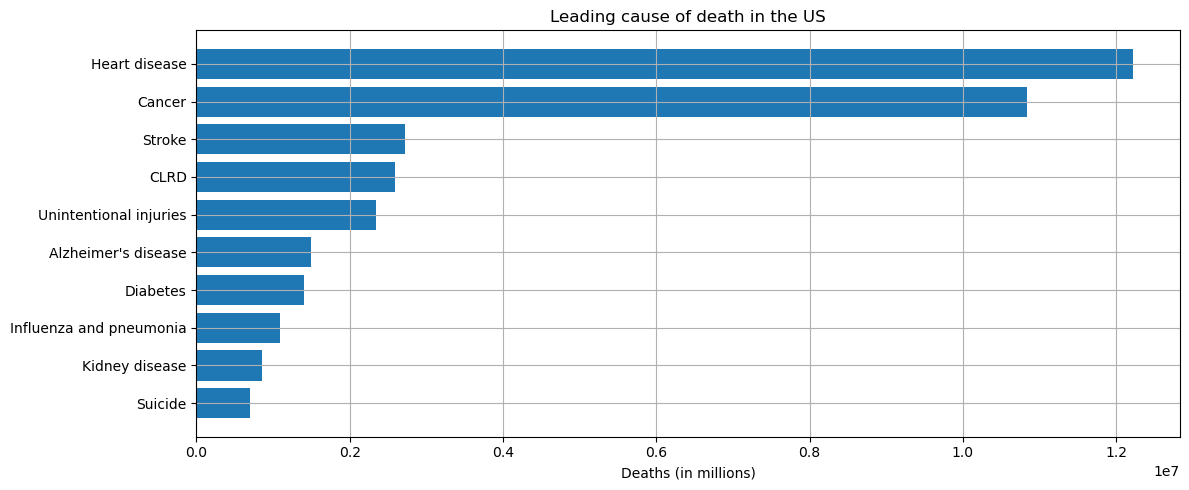

In [9]:
plt.figure(figsize=(12,5))
causes_us = data_us.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=True).reset_index(name='count')
plt.barh(causes_us['Cause Name'][:-1], causes_us['count'][:-1])
plt.grid(True)
plt.xlabel('Deaths (in millions)')
plt.title("Leading cause of death in the US")
save_fig('Overall cause of death in the US')
plt.show()

So we see that heart disease is the leading cause of death in America right before that is cancer. since these values will ruin the overall distribution of causes relative to state we will remove any row with state being labeled `United States`. We also have summation rows for each state labeled `All Causes` in the 113 Cause name we will also have to drop that too as that will affect our distribution of deaths as they are being counted twice.

In [10]:
data = data.drop(data_us.index, axis=0)
all_causes = data[data['113 Cause Name'] == 'All Causes']
data = data.drop(all_causes.index, axis=0)

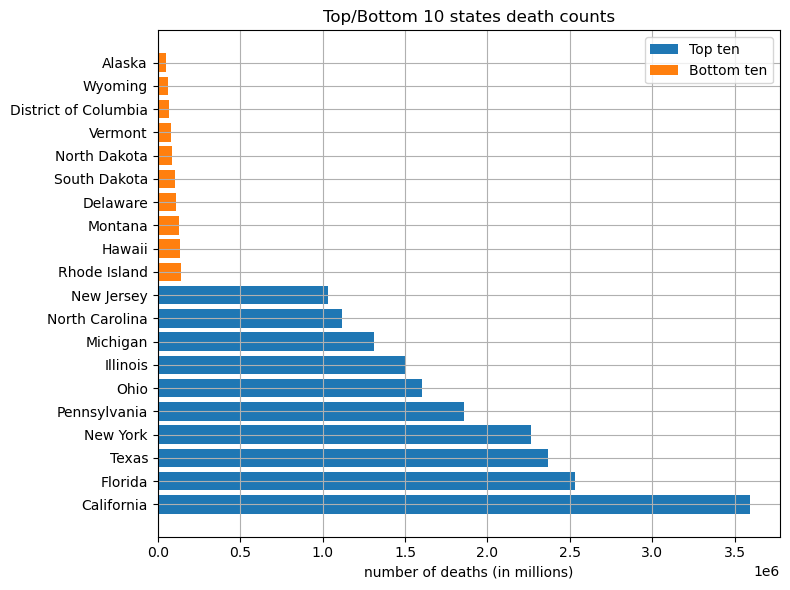

In [11]:
plt.figure(figsize=(8,6))
state_deaths = data.groupby('State')['Deaths'].sum().sort_values(ascending=False).reset_index(name='count')
plt.barh(state_deaths['State'][:10], state_deaths['count'][:10], label='Top ten')
plt.barh(state_deaths['State'][-11:-1], state_deaths['count'][-11:-1], label='Bottom ten')
plt.legend()
plt.grid(True)
plt.xlabel('number of deaths (in millions)')
plt.title("Top/Bottom 10 states death counts")
save_fig('Top and Bottom 10 state death count')
plt.show()

So as expected the denser places in america experience the highest death rates, California experiencing the most amount of deaths. while states with small populations like Alaska experience the least amount of deaths.

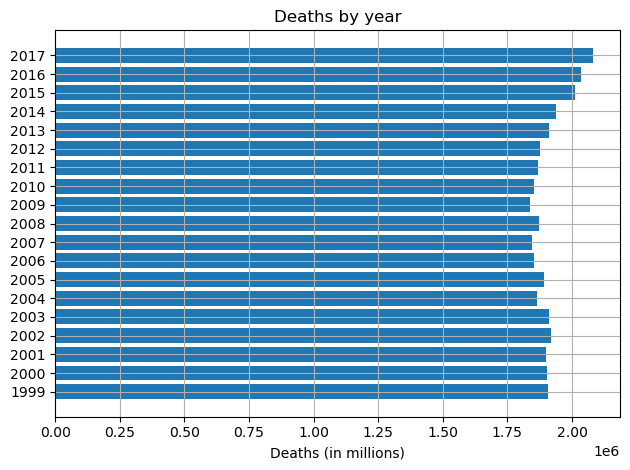

In [12]:
Yearly_deaths = data.groupby('Year')['Deaths'].sum().reset_index(name='count')
plt.barh(Yearly_deaths['Year'], Yearly_deaths['count'])
plt.title('Deaths by year')
plt.yticks(Yearly_deaths['Year'])
plt.xlabel('Deaths (in millions)')
plt.grid()
save_fig('Deaths per year')
plt.show()

it looks like death rates have been steadily increasing time goes forward with a couple years where deaths were down comparitivly to the year prior

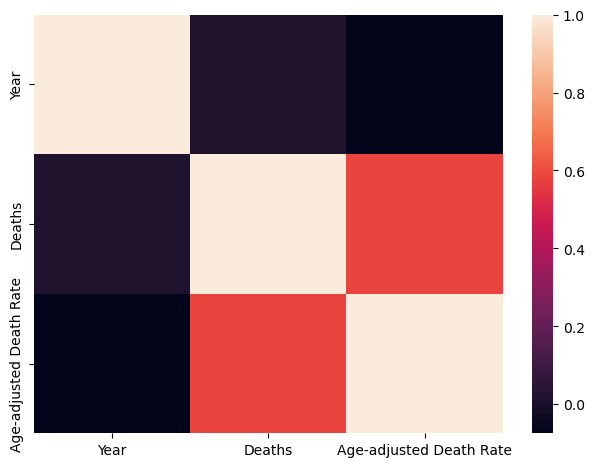

In [13]:
sns.heatmap(data.corr())
save_fig('correlation heat map')
plt.show()

So just looking at the heat map it looks like the the Year does not really affect whether or not Death/Death rate goes up

For our initial EDA it looks as though that we have a general understanding of the data. We see that year does not really affect death rates nor individual states cause of deaths. We also see that some states outweight the number of deaths in comparison. Sometimes these states like california experience 10X more deaths than California. We also found what the leading cause of death appears to be heart disease followed by cancer for the most part. 

We will then predict the death rate based on number of death, causes, and state.

In [14]:
target = data['Cause Name']
X_data = data.drop(columns='Cause Name')


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indx, test_indx = next(strat_shuffle_split.split(X_data, target))
X_train, X_test = X_data.iloc[train_indx], X_data.iloc[test_indx]
y_train, y_test = target.iloc[train_indx], target.iloc[test_indx]
X_train.columns

Index(['Year', '113 Cause Name', 'State', 'Deaths', 'Age-adjusted Death Rate'], dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['Deaths', 'Age-adjusted Death Rate']
cat_features = ['113 Cause Name', 'State']

ct = ColumnTransformer(
    [('cat_transform', OneHotEncoder(sparse=False), cat_features),
     ('num_transform', StandardScaler(), numeric_features)]
)

X_train_preprocessed = ct.fit_transform(X_train)
X_test_preprocessed = ct.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.1)
log_reg.fit(X_train_preprocessed, y_train)      
log_reg.score(X_test_preprocessed, y_test)

1.0

This is probably very accurate because every `113 Cause Name` is directly related to every `Cause Name` we will try to see if we can classify without knowing `113 Cause Name` and see if we can make any connections with just death and state

In [23]:
X_train_no_name = X_train.drop(columns=['113 Cause Name'])
X_test_no_name = X_test.drop(columns=['113 Cause Name'])

In [28]:
cat_features = ['State']
ct = ColumnTransformer(
    [('cat_transform', OneHotEncoder(sparse=False), cat_features),
     ('num_transform', StandardScaler(), numeric_features)]
)
X_train_preprocessed = ct.fit_transform(X_train_no_name)
X_test_preprocessed = ct.transform(X_test_no_name)
log_reg.fit(X_train_preprocessed, y_train)
log_reg.score(X_test_preprocessed, y_test)

0.3080495356037152

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
tree_clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=10, random_state=42)
tree_clf.fit(X_train_preprocessed, y_train)
print(tree_clf.score(X_test_preprocessed, y_test))

ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train_preprocessed, y_train)
ada_boost.score(X_test_preprocessed, y_test)

0.5392156862745098


0.3142414860681115

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=1_000, min_samples_leaf=20, max_depth=10)
gb_clf.fit(X_train_preprocessed, y_train)
gb_clf.score(X_test_preprocessed, y_test)

0.6393188854489165

In [34]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(GradientBoostingClassifier(n_estimators=1_000, min_samples_leaf=20, max_depth=10), n_estimators=100, max_samples=50, n_jobs=-1, random_state=42)
bag_clf.fit(X_train_preprocessed, y_train)
bag_clf.score(X_test_preprocessed, y_test)

0.31217750257997934

In [37]:
from xgboost import XGBRFClassifier
from sklearn.preprocessing import LabelEncoder
xgbr_clf = XGBRFClassifier()
label_encoder = LabelEncoder()
y_train_label = label_encoder.fit_transform(y_train)
y_test_label = label_encoder.transform(y_test)
xgbr_clf.fit(X_train_preprocessed, y_train_label)
xgbr_clf.score(X_test_preprocessed, y_test_label)

0.5144478844169247

It looks like Gradienboosting is our best model so far so we will try to hyper-tune that model

In [42]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'learning_rate': np.random.uniform(0.0001, 1, 200),
    'n_estimators': range(0,1000, 100),
    'min_samples_leaf': range(10, 30, 5),
    'max_depth': range(3,10)
}
grb_clf = GradientBoostingClassifier()
clf = RandomizedSearchCV(grb_clf, param_distributions=params, n_jobs=-1,n_iter=100)
clf.fit(X_train_preprocessed, y_train)
clf.score(X_test_preprocessed, y_test)

c:\Users\travi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\travi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\travi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "c:\Users\travi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 269, in _check_params
    raise ValueError(
ValueError: n_estimators must be greater than 0 but was 0

  war

0.653766769865841

In [43]:
best_model = clf.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.5340716762288081, max_depth=5,
                           min_samples_leaf=10, n_estimators=900)

In [49]:
print(best_model.score(X_test_preprocessed, y_test))
best_model.feature_importances_

0.653766769865841


array([0.00275561, 0.00296523, 0.00298751, 0.00256031, 0.00150983,
       0.00360284, 0.00577672, 0.002895  , 0.00349409, 0.00312804,
       0.00194817, 0.00508002, 0.00116627, 0.00193773, 0.0016195 ,
       0.00194639, 0.00140962, 0.00298054, 0.00239177, 0.002383  ,
       0.00585454, 0.00434366, 0.00168254, 0.0032361 , 0.00257571,
       0.00115093, 0.0018233 , 0.00298203, 0.00530449, 0.00171011,
       0.00271527, 0.00331273, 0.00673706, 0.00129919, 0.00218216,
       0.00120564, 0.0039431 , 0.00196577, 0.00221669, 0.00271274,
       0.00225121, 0.00151229, 0.00302433, 0.00168025, 0.0044324 ,
       0.00229783, 0.00107087, 0.00377163, 0.00410561, 0.00167481,
       0.00228259, 0.24219949, 0.61620474])

Looks like the best we can do without Cause name is 65.38% accuracy and it seems like deaths and death-rates are the column of most significance when deciding the name of the cause. 